#3. Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#4. Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
%matplotlib inline

#5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. 

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6869)

#6. Repeat for the internet use dataset. Call this DataFrame internet_df.

In [4]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4496)

#5b. Take a look at the first 6 rows.

In [5]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


#6b. Take a look at the first six rows.

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each DataFrame - how many rows? How many columns?

gdp_df 4 columns, 6869 rows
internet_df 4 columns, 4496 columns
gdp_df has 6873 rows, but the last 4 are just notation and footer so 6869 rows that are needed here.
internet_df has 4688 rows but a lot of footer notes, so we cut those out to leave 4496 rows.

In [7]:
print(gdp_df.info)
print(internet_df.info)

<bound method DataFrame.info of      Country or Area      Year        Value  Value Footnotes
0        Afghanistan      2019  2065.036398              NaN
1        Afghanistan      2018  2033.779002              NaN
2        Afghanistan      2017  2058.383832              NaN
3        Afghanistan      2016  2057.062164              NaN
4        Afghanistan      2015  2068.265904              NaN
...              ...       ...          ...              ...
6864        Zimbabwe      1993  3033.504852              NaN
6865        Zimbabwe      1992  3054.889178              NaN
6866        Zimbabwe      1991  3426.598094              NaN
6867        Zimbabwe      1990  3324.348171              NaN
6868   footnoteSeqID  Footnote          NaN              NaN

[6869 rows x 4 columns]>
<bound method DataFrame.info of      Country or Area      Year     Value  Value Footnotes
0        Afghanistan      2014  6.390000              NaN
1        Afghanistan      2013  5.900000              NaN
2   

#8. Take a look at the datatypes for the columns in each DataFrame.

In [8]:
print(gdp_df.dtypes)
print(internet_df.dtypes)

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object
Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object


#9. Take a look at the last 10 rows of each DataFrame in turn.

In [9]:
print(gdp_df.tail(10))
print(internet_df.tail(10))

     Country or Area      Year        Value  Value Footnotes
6859        Zimbabwe      1998  3653.920016              NaN
6860        Zimbabwe      1997  3580.048793              NaN
6861        Zimbabwe      1996  3520.430146              NaN
6862        Zimbabwe      1995  3226.413930              NaN
6863        Zimbabwe      1994  3263.934978              NaN
6864        Zimbabwe      1993  3033.504852              NaN
6865        Zimbabwe      1992  3054.889178              NaN
6866        Zimbabwe      1991  3426.598094              NaN
6867        Zimbabwe      1990  3324.348171              NaN
6868   footnoteSeqID  Footnote          NaN              NaN
     Country or Area      Year     Value  Value Footnotes
4486        Zimbabwe      2001  0.799846              NaN
4487        Zimbabwe      2000  0.401434              NaN
4488        Zimbabwe      1999  0.161676              NaN
4489        Zimbabwe      1998  0.081648              NaN
4490        Zimbabwe      1997  0.03308

In [10]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"})
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
internet_df = internet_df.drop(columns=['Value Footnotes'])

#10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [11]:
print(gdp_df.tail(10))
print(internet_df.tail(10))

            Country      Year  GDP_Per_Capita
6859       Zimbabwe      1998     3653.920016
6860       Zimbabwe      1997     3580.048793
6861       Zimbabwe      1996     3520.430146
6862       Zimbabwe      1995     3226.413930
6863       Zimbabwe      1994     3263.934978
6864       Zimbabwe      1993     3033.504852
6865       Zimbabwe      1992     3054.889178
6866       Zimbabwe      1991     3426.598094
6867       Zimbabwe      1990     3324.348171
6868  footnoteSeqID  Footnote             NaN
            Country      Year  Internet_Users_Pct
4486       Zimbabwe      2001            0.799846
4487       Zimbabwe      2000            0.401434
4488       Zimbabwe      1999            0.161676
4489       Zimbabwe      1998            0.081648
4490       Zimbabwe      1997            0.033080
4491       Zimbabwe      1996            0.016790
4492       Zimbabwe      1995            0.007684
4493       Zimbabwe      1994            0.001739
4494       Zimbabwe      1990            0.0

In [12]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'],how='outer')

In [13]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2019     2065.036398                 NaN
1     Afghanistan  2018     2033.779002                 NaN
2     Afghanistan  2017     2058.383832                 NaN
3     Afghanistan  2016     2057.062164                 NaN
4     Afghanistan  2015     2068.265904                 NaN
...           ...   ...             ...                 ...
7901        Yemen  1999             NaN            0.056629
7902        Yemen  1998             NaN            0.023323
7903        Yemen  1997             NaN            0.015025
7904        Yemen  1996             NaN            0.000621
7905        Yemen  1990             NaN            0.000000

[7906 rows x 4 columns]


In [14]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [15]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7901,Yemen,1999,NaN,0.056629
7902,Yemen,1998,NaN,0.023323
7903,Yemen,1997,NaN,0.015025
7904,Yemen,1996,NaN,0.000621
7905,Yemen,1990,NaN,0.000000


In [16]:
gdp_and_internet_use.drop(gdp_and_internet_use.tail(1).index,
        inplace = True)

In [17]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,2000,NaN,0.082500
7901,Yemen,1999,NaN,0.056629
7902,Yemen,1998,NaN,0.023323
7903,Yemen,1997,NaN,0.015025
7904,Yemen,1996,NaN,0.000621


In [18]:
#gdp_and_internet_use_2009 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2019'] We want 2004, 2009, and 2014
#The below code breaks the kernel everytime lol, don't use it
#gdpyears = np.logical_or(gdp_and_internet_use['Year'] == '2004', gdp_and_internet_use['Year'] == '2009', gdp_and_internet_use['Year'] == '2014')
#gdprealyears = np.logical_or(gdpyears == 2004, gdpyears == 2009, gdpyears == 2014)
#gdp_and_internet_use[gdp_and_internet_use[gdprealyears]]
#s = df[df['color'].isin(['Yellow', 'Green'])]

#16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.
#17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [19]:
gdp_realyears = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]
#gdp_realyears is kind of a dumb name for this, but I'm sticking with it
gdp_int2004 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2004']
gdp_int2009 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2009']
gdp_int2014 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2014']

In [20]:
print(gdp_realyears)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234            6.390000
10              Afghanistan  2009     1758.904043            3.550000
15              Afghanistan  2004     1200.278256            0.105809
23                  Albania  2014    11623.866679           60.100000
28                  Albania  2009    10346.864199           41.200000
...                     ...   ...             ...                 ...
7869  Virgin Islands (U.S.)  2009             NaN           27.396510
7874  Virgin Islands (U.S.)  2004             NaN           27.377009
7886                  Yemen  2014             NaN           22.550000
7891                  Yemen  2009             NaN            9.960000
7896                  Yemen  2004             NaN            0.881223

[830 rows x 4 columns]


#18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).
*Iceland has the higest 2014 internet users at 96.18%*

In [21]:
#df.nlargest(n=5, columns=['Magnitude', 'Depth'])
print(gdp_int2014.nlargest(n=1, columns=['Internet_Users_Pct']))

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014      49652.1495               98.16


#20. Repeat for 2004 and 2009.
Sweden in 2004 at 83.39%, Iceland in 2009 at 93%

In [22]:
print(gdp_int2004.nlargest(n=1, columns=['Internet_Users_Pct']))
print(gdp_int2009.nlargest(n=1, columns=['Internet_Users_Pct']))
#Sweden in 2004 at 83.39%, Iceland in 2009 at 93%

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019  Sweden  2004    44496.023401               83.89
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123                93.0


#19. Which country had the lowest percentage of internet users in 2014? What was the percentage?
Looks like The good ol' North Korea is crushing it on internet percentage. In 2004 & 2009

In [23]:
print(gdp_int2004.nsmallest(n=1, columns=['Internet_Users_Pct']))
print(gdp_int2009.nsmallest(n=1, columns=['Internet_Users_Pct']))
print(gdp_int2014.nsmallest(n=1, columns=['Internet_Users_Pct']))
#Look at .sort to see if you could use this instead! .sort_values(by='column', ascending=False)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7089  Dem. People's Rep. of Korea  2004             NaN                 0.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7084  Dem. People's Rep. of Korea  2009             NaN                 0.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7080  Dem. People's Rep. of Korea  2014             NaN                 0.0


#21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?
#22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?
Macao SAR(???) with the highest GDP_Per_Capita as 108,761 (Dollars? Idk what currency this is in)
Central African Republic has the lowest GDP_Per_Capita at 886.

In [24]:
print(gdp_int2014.nlargest(n=1, columns=['GDP_Per_Capita']))
print(gdp_int2014.nsmallest(n=1, columns=['GDP_Per_Capita']))

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014    156514.13385                 NaN
                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN


#23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, '2004')

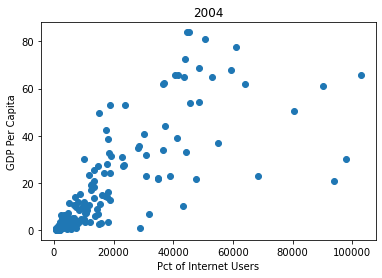

In [43]:
plt.scatter(gdp_int2004['GDP_Per_Capita'],gdp_int2004['Internet_Users_Pct'])
plt.ylabel('GDP Per Capita')
plt.xlabel('Pct of Internet Users')
plt.title('2004')

Text(0.5, 1.0, '2009')

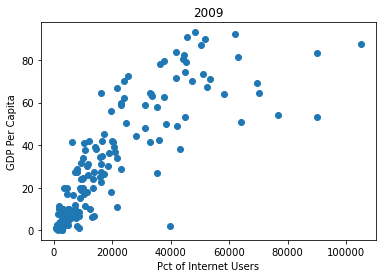

In [44]:
plt.scatter(gdp_int2009['GDP_Per_Capita'],gdp_int2009['Internet_Users_Pct'])
plt.ylabel('GDP Per Capita')
plt.xlabel('Pct of Internet Users')
plt.title('2009')

Text(0.5, 1.0, '2014')

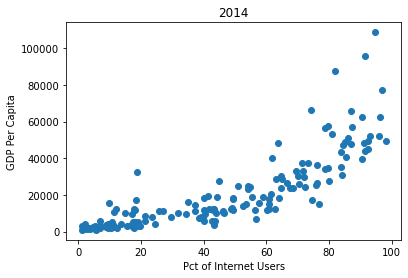

In [27]:
plt.scatter(gdp_int2014['Internet_Users_Pct'], gdp_int2014['GDP_Per_Capita'])
plt.ylabel('GDP Per Capita')
plt.xlabel('Pct of Internet Users')
plt.title('2014')

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <BarContainer object of 10 artists>)

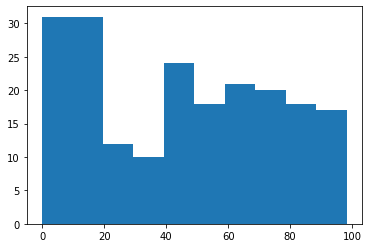

In [28]:
plt.hist(gdp_int2014['Internet_Users_Pct'])

(array([146.,  41.,  25.,  18.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <BarContainer object of 10 artists>)

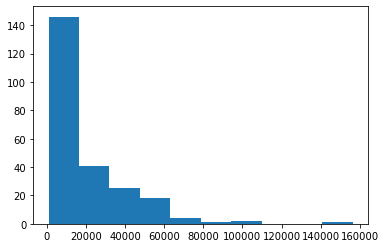

In [29]:
plt.hist(gdp_int2014['GDP_Per_Capita'])

Array of integers is unimodal, if:

-it is strictly increasing in the beginning;

-after that it is constant;

-after that it is strictly decreasing.

Ok yeah, all of these are looking pretty darn unimodal to me! Especially in 2009 & 2014, 2004 was pretty early on.


#27. What are the top 5 countries in terms of internet use in 2014?

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014    49652.149500               98.16
561   Bermuda  2014    77361.104881               96.80
4648   Norway  2014    62589.373548               96.30
1452  Denmark  2014    52214.537753               95.99
6872  Andorra  2014             NaN               95.90

#28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [30]:
gpd_int2014topinternet = gdp_int2014.nlargest(n=5, columns=['Internet_Users_Pct'])
print(gpd_int2014topinternet)
top_5_internet = gdp_realyears[gdp_realyears['Country'].isin(gpd_int2014topinternet['Country'])]

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014    49652.149500               98.16
561   Bermuda  2014    77361.104881               96.80
4648   Norway  2014    62589.373548               96.30
1452  Denmark  2014    52214.537753               95.99
6872  Andorra  2014             NaN               95.90


Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

This top_5_internet works really well!!!

In [31]:
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
561   Bermuda  2014    77361.104881           96.800000
566   Bermuda  2009    89961.982744           83.250000
571   Bermuda  2004    90195.811033           60.990867
1452  Denmark  2014    52214.537753           95.990000
1457  Denmark  2009    50274.075696           86.840000
1462  Denmark  2004    50607.628971           80.930000
2625  Iceland  2014    49652.149500           98.160000
2630  Iceland  2009    48177.084123           93.000000
2635  Iceland  2004    45145.545658           83.880000
4648   Norway  2014    62589.373548           96.300000
4653   Norway  2009    61886.564498           92.080000
4658   Norway  2004    60893.410993           77.690000
6872  Andorra  2014             NaN           95.900000
6877  Andorra  2009             NaN           78.530000
6882  Andorra  2004             NaN           26.837954


Andorra really flew up the list in the 10 year span, gaining ~35% of the total population in internet users in the time frame

g = sns.FacetGrid(df, col = "Product", row = 'Day')

Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

#29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

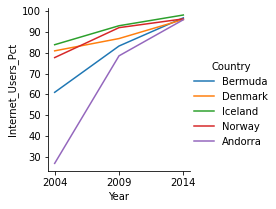

In [32]:
grid = sns.FacetGrid(top_5_internet, hue = "Country")
grid.map(sns.lineplot, 'Year', 'Internet_Users_Pct')
plt.xlim(reversed(plt.xlim()))
#grid.xticks('2004','2009','2014')
grid.add_legend()
#This works for now, but I want to move the year to a different order
#The plt.xlim swapped it around, thanks google!!

#30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [33]:
gpd_int2014bottominternet = gdp_int2014.nsmallest(n=5, columns=['Internet_Users_Pct'])
print(gpd_int2014bottominternet)
bottom_5_internet = gdp_realyears[gdp_realyears['Country'].isin(gpd_int2014bottominternet['Country'])]

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7080  Dem. People's Rep. of Korea  2014             NaN                0.00
7138                      Eritrea  2014             NaN                0.99
6219                  Timor-Leste  2014     3264.568070                1.14
827                       Burundi  2014      886.235777                1.38
7675                      Somalia  2014             NaN                1.63


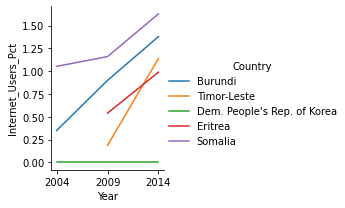

In [34]:
grid = sns.FacetGrid(bottom_5_internet, hue = "Country")
grid.map(sns.lineplot, 'Year', 'Internet_Users_Pct')
plt.xlim(reversed(plt.xlim()))
grid.add_legend()

#31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80


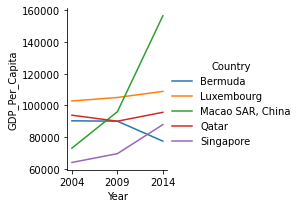

In [35]:
print(gdp_int2014.nlargest(n=5, columns=['GDP_Per_Capita']))
gdp_int2014topgdp = gdp_int2014.nlargest(n=5, columns=['GDP_Per_Capita'])
top_5_GDP = gdp_realyears[gdp_realyears['Country'].isin(gdp_int2014topgdp['Country'])]
grid = sns.FacetGrid(top_5_GDP, hue = "Country")
grid.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
plt.xlim(reversed(plt.xlim()))
grid.add_legend()

#32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95


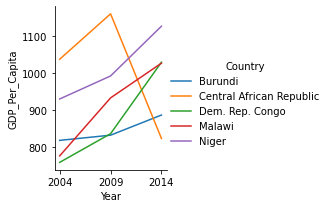

In [36]:
print(gdp_int2014.nsmallest(n=5, columns=['GDP_Per_Capita']))
gdp_int2014bottomgdp = gdp_int2014.nsmallest(n=5, columns=['GDP_Per_Capita'])
bottom_5_GDP = gdp_realyears[gdp_realyears['Country'].isin(gdp_int2014bottomgdp['Country'])]
grid = sns.FacetGrid(bottom_5_GDP, hue = "Country")
grid.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
plt.xlim(reversed(plt.xlim()))
grid.add_legend()

#33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Yes & No, 
The top 5 internet user percentage usually contains small, isolated countries (or countries that are too cold to do anything outside for like half the year)
Personally, I've never heard of Macao SAR. And, after some googling, I'm still not entirely sure what it is?? But a semi-autonomous region in China that also has a lot of powerful people there (maybe). So that makes sense that it has a very high GDP. Bermuda is interesting to me, and I wonder if that's from a tax evasion standpoint or if it's tourism.

Also it stinks to live in North Korea, but that's not a surprise. 

In [37]:
sf6_df = pd.read_csv("../data/sf6_emissions.csv", nrows=1256)

In [38]:
sf6_df.head(5)

,Country or Area,Year,Value
0,Australia,2019,136.861720
1,Australia,2018,145.265400
2,Australia,2017,115.357167
3,Australia,2016,117.125146
4,Australia,2015,116.172156


In [39]:
sf6_df.tail(5)

,Country or Area,Year,Value
1245,United States of America,1994,26070.978093
1246,United States of America,1993,27376.914814
1247,United States of America,1992,27828.740019
1248,United States of America,1991,27623.544686
1249,United States of America,1990,28845.725549


In [40]:
print(sf6_df.dtypes)
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
dtype: object
Country            object
Year               object
GDP_Per_Capita    float64
dtype: object


Hmmm, not sure what the issue here is

In [41]:
sf6_df = sf6_df.rename(columns={"Country or Area":"Country", "Value":"SF6_Emissions"})
sf6_df['Year'].astype(object)

0       2019
1       2018
2       2017
3       2016
4       2015
        ... 
1245    1994
1246    1993
1247    1992
1248    1991
1249    1990
Name: Year, Length: 1250, dtype: object

In [42]:
gdp_internet_sf6_emissions = pd.merge(gdp_and_internet_use, sf6_df, on=['Country','Year'],how='outer')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
gdp_internet_sf6_emissions.head(5)

In [ ]:
print(gdp_internet_sf6_emissions.nlargest(n=25, columns=['SF6_Emissions']))

THAT'S RIGHT WE'RE #1 BAYBEEEEEE

In [ ]:
print(gdp_internet_sf6_emissions.nlargest(n=10, columns=['SF6_Emissions']))

In [ ]:
sf6_realyears = gdp_internet_sf6_emissions[gdp_internet_sf6_emissions['Year'].isin(['1999', '2000'])]

In [ ]:
print(sf6_realyears.nlargest(n=10, columns=['SF6_Emissions']))

This is frustrating me why it's not quite merging correctly, but I feel find with how the data came together.